In [17]:
!pip install scikit-fuzzy

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

suhu = ctrl.Antecedent(np.arange(0,50,1),'Suhu') #nilai semesta untuk input suhu dengan increament 1
kelembaban = ctrl.Antecedent(np.arange(0,100,1),'Kelembaban') #nilai semesta untuk input kelembaban dengan increament 1
air = ctrl.Consequent(np.arange(0,40,1),'Air') #nilai semesta untuk output air dengan increament 1

suhu['dingin'] = fuzz.trapmf(suhu.universe,[0,0,15,20])
suhu['sejuk'] = fuzz.trimf(suhu.universe,[15,20,25])
suhu['normal'] = fuzz.trimf(suhu.universe,[20,25,30])
suhu['hangat'] = fuzz.trimf(suhu.universe,[25,30,35])
suhu['panas'] = fuzz.trapmf(suhu.universe,[30,35,50,50])

kelembaban['kering'] = fuzz.trapmf(kelembaban.universe,[0,0,25,50])
kelembaban['normal'] = fuzz.trimf(kelembaban.universe,[25,50,75])
kelembaban['basah'] = fuzz.trapmf(kelembaban.universe,[50,75,100,100])

air['sangat_sedikit'] = fuzz.trapmf(air.universe,[0,0,5,10])
air['sedikit'] = fuzz.trimf(air.universe,[5,10,15])
air['cukup_sedikit'] = fuzz.trimf(air.universe,[10,15,20])
air['sedang'] = fuzz.trimf(air.universe,[15,20,25])
air['cukup_banyak'] = fuzz.trimf(air.universe,[20,25,30])
air['banyak'] = fuzz.trimf(air.universe,[25,30,35])
air['sangat_banyak'] = fuzz.trapmf(air.universe,[30,35,40,40])

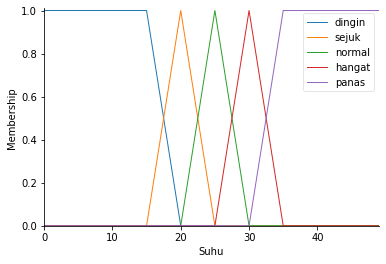

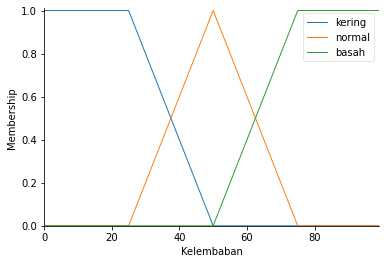

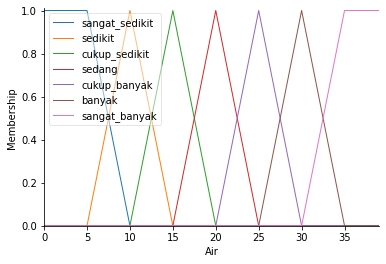

In [19]:
suhu.view()
kelembaban.view()
air.view()

In [20]:
rule1 = ctrl.Rule(suhu['dingin'] & kelembaban['kering'], air['cukup_sedikit'])
rule2 = ctrl.Rule(suhu['dingin'] & kelembaban['normal'], air['sedikit'])
rule3 = ctrl.Rule(suhu['dingin'] & kelembaban['basah'], air['sangat_sedikit'])
rule4 = ctrl.Rule(suhu['sejuk'] & kelembaban['kering'], air['sedang'])
rule5 = ctrl.Rule(suhu['sejuk'] & kelembaban['normal'], air['cukup_sedikit'])
rule6 = ctrl.Rule(suhu['sejuk'] & kelembaban['basah'], air['sedikit'])
rule7 = ctrl.Rule(suhu['normal'] & kelembaban['kering'], air['cukup_banyak'])
rule8 = ctrl.Rule(suhu['normal'] & kelembaban['normal'], air['sedang'])
rule9 = ctrl.Rule(suhu['normal'] & kelembaban['basah'], air['cukup_sedikit'])
rule10 = ctrl.Rule(suhu['hangat'] & kelembaban['kering'], air['banyak'])
rule11 = ctrl.Rule(suhu['hangat'] & kelembaban['normal'], air['cukup_banyak'])
rule12 = ctrl.Rule(suhu['hangat'] & kelembaban['basah'], air['sedang'])
rule13 = ctrl.Rule(suhu['panas'] & kelembaban['kering'], air['sangat_banyak'])
rule14 = ctrl.Rule(suhu['panas'] & kelembaban['normal'], air['banyak'])
rule15 = ctrl.Rule(suhu['panas'] & kelembaban['basah'], air['cukup_banyak'])

air_scoring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
air_scoring = ctrl.ControlSystemSimulation(air_scoring_ctrl)


Masukkan nilai suhu (0 - 50 C):23
Masukkan nilai kelembaban (0 - 100 %):47
Banyak air yang diberikan : 18.74 L


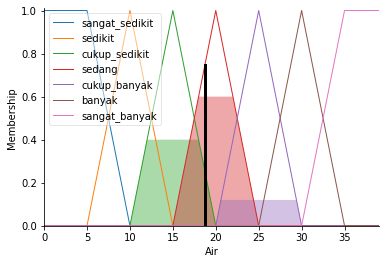

In [22]:
x_suhu = input("Masukkan nilai suhu (0 - 50 C):")
x_kelembaban = input("Masukkan nilai kelembaban (0 - 100 %):")
air_scoring.input['Suhu'] = int(x_suhu)
air_scoring.input['Kelembaban'] = int(x_kelembaban)
air_scoring.compute()
print("Banyak air yang diberikan :",round(air_scoring.output['Air'],2),'L')
air.view(sim=air_scoring)